<a href="https://colab.research.google.com/github/jazmani6/MNIST-Deep-Learning-Examples/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=1249cf952bf6af4d0c8f8779e25c59fa8023dc544d8024ca7c002f931e694715
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

train_data=idx2numpy.convert_from_file('drive/MyDrive/datasets/train-images.idx3-ubyte')
train_data = np.reshape(train_data,(60000,28*28))
train_label = idx2numpy.convert_from_file('drive/MyDrive/datasets/train-labels.idx1-ubyte')
print(train_data.shape)
print(train_label.shape)

test_data=idx2numpy.convert_from_file('drive/MyDrive/datasets/t10k-images.idx3-ubyte')
test_data = np.reshape(test_data,(10000,28*28))
test_label = idx2numpy.convert_from_file('drive/MyDrive/datasets/t10k-labels.idx1-ubyte')
print(test_data.shape)
print(test_label.shape)

ModuleNotFoundError: ignored

Projected PCA as found by the dot product of Eigenvectors and Centered fitted data (X)
 

In [ ]:
from sklearn.preprocessing import StandardScaler
xcov = StandardScaler().fit_transform(train_data)
print(xcov.shape)

mean = np.mean(xcov, axis = 0)
X = xcov - mean

covar_mat = np.cov(X, rowvar=0)

# Step 2: Find the Eigenvalues and eigenvectors of said Covariance Matrix.
lamb, u = np.linalg.eig(covar_mat)


# Sort the (eigenvalues from highest to lowest
idx = lamb.argsort()[::-1]   
lamb = lamb[idx]
u = u[:,idx]

m = [2, 10, 50, 100, 200, 300]
dim = 784

proj = u.T.dot(X.T)
print ("The projected PCA for all digits is:")
print(proj.T)



(60000, 784)
The projected PCA for all digits is:
[[ 9.22158806e-01 -4.81479035e+00 -6.75598364e-02 ...  4.93168237e-15
  -8.79214826e-15  3.11471285e-14]
 [-8.70897698e+00 -7.75440302e+00  3.44791044e+00 ...  1.62042835e-15
  -4.76501396e-15 -2.02629283e-14]
 [-2.32838932e+00  9.43133817e+00  6.18411405e+00 ...  4.95708205e-16
   3.66588388e-15 -3.41796658e-16]
 ...
 [ 3.77721201e+00 -3.23056436e+00  3.80619883e+00 ... -4.77785034e-15
   2.72176252e-15 -2.84539883e-14]
 [-1.72236917e+00 -4.94812525e+00 -6.95122764e-03 ... -3.55431309e-15
   1.75214163e-15 -4.07466439e-14]
 [ 1.42725062e+00 -6.17538558e+00  2.96768709e+00 ...  2.74809338e-17
   1.27731523e-15 -1.87484777e-14]]


EigenValues


(784,)


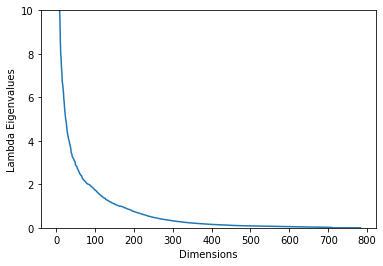

In [ ]:

print(np.shape(lamb))
plt.ylabel('Lambda Eigenvalues')
plt.xlabel('Dimensions')
plt.ylim(0, 10)
plt.plot(range(0,dim),lamb)
plt.show()


Finding Total Distortion Error

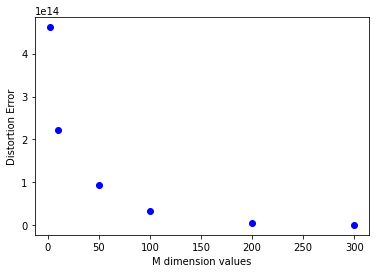

In [ ]:
distortion = np.zeros(len(m))
#Using the Eq 4.5 to find the Distortion error as sum of the norm of x - x_bar
principal = (proj).dot(X)
x_bar = (proj.T).dot(principal.T) + mean
error = xcov - x_bar
for s in m:
  for i in range(s, 784):
    distortion[m.index(s)] += np.linalg.norm(error[:,i])**2

distortion = distortion/784


plt.plot(m, distortion, 'bo')
plt.xlabel("M dimension values")
plt.ylabel("Distortion Error")
plt.show()